###Week 11: Convolutional Neural Networks (CNN)
Objective: Learn image classification using CNNs.

####Experiment 11:

Implement a CNN model to classify images from the CIFAR-10 dataset.
* Show the Test Accuracy, Training vs Validation Accuracy, Training vs Validation Loss and Predictions

Note: CIFAR-10 Dataset: The CIFAR-10 dataset contains 60,000 32x32 color images in 10 classes. CIFAR-10 dataset can be loaded using cifar10.load_data().

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load CIFAR-10 dataset
cifar10 = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Normalize pixel values (0-255) to (0-1) range
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# Define CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 52ms/step - accuracy: 0.3396 - loss: 1.7713 - val_accuracy: 0.5402 - val_loss: 1.2720
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.5639 - loss: 1.2166 - val_accuracy: 0.6103 - val_loss: 1.1041
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.6392 - loss: 1.0270 - val_accuracy: 0.6581 - val_loss: 0.9932
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.6775 - loss: 0.9153 - val_accuracy: 0.6712 - val_loss: 0.9535
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.7037 - loss: 0.8409 - val_accuracy: 0.6716 - val_loss: 0.9517
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 45ms/step - accuracy: 0.7287 - loss: 0.7754 - val_accuracy: 0.6871 - val_loss: 0.8903
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 44ms/step - accuracy: 0.7443 - loss: 0.7311 - val_accuracy: 0.6964 - val_loss: 0.8805
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7586 -

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 - 4s - 11ms/step - accuracy: 0.7082 - loss: 0.8805
Test Accuracy: 0.7082


In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

Text(0.5, 1.0, 'Training vs Validation Accuracy')

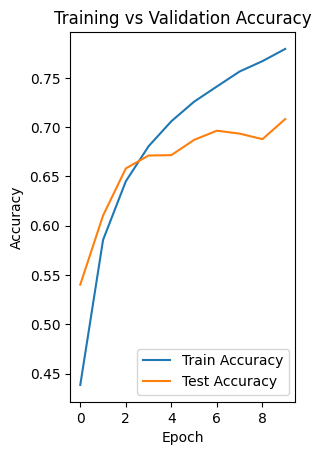

In [ ]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

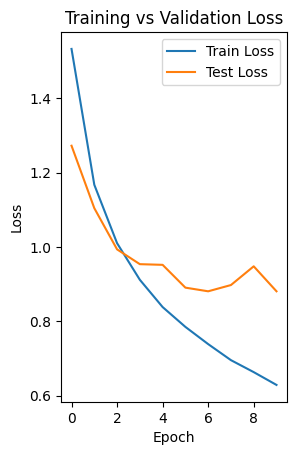

In [ ]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


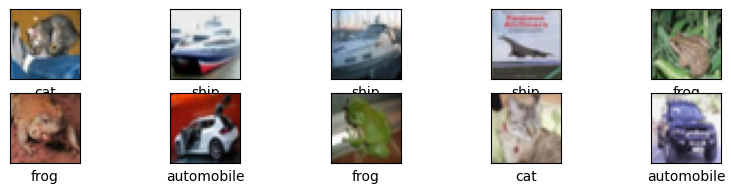

In [ ]:
# Display some predictions
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predictions = model.predict(x_test[:10])
predicted_labels = np.argmax(predictions, axis=1)
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[predicted_labels[i]])
plt.show()